<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/INFORME_CU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Informe Provincial Cuenca
##Descarga y limpeza de datos

Comenzamos cargando los datos de la carpeta de Google Drive en la que estén guardados (será necesario cambiar esta ruta en función de la ruta del ordenador).

Es necesario aceptar la conexión con la cuenta de Google Drive.

Importante y esencial, antes de tirar el código es necesario que la carpeta de Drive a la que se va a llamar tenga los archivos en formato xlsx así nombrados: 'CU_SAAF.xlsx', 'CU_AT.xlsx', 'CU_EMPLEO.xlsx', 'CU_LOG.xlsx' para que no haya errores a la hora de ejecutar este código.

**¡OJO! Primeros archivo con extensión xlsx y los de las zonas a clasificar, con extensión csv, en teoría, los csv no deberían modificarse (a menos que las normativas cambien y con ello las zonas de impacto se modifiquen).**

**Y todos las columnas deben tener los nombres definidos en el documento "Resumen de datos por servicio FASPAS" y en mayúsculas antes de ser subidos al programa.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se importan las librerías necesarias para la parte de carga de datos y su limpieza.

In [2]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.7 MB/s eta 0:00:00


In [3]:
import os
import pandas as pd
import numpy as np
from unidecode import unidecode
import matplotlib.pyplot as plt

In [43]:
# Asegúrarse de cambiar la ruta por el nombre real de la carpeta en Google Drive
folder_path = '/content/drive/My Drive/PFG_FASPAS/CU'
docs_xlsx = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]
print(docs_xlsx)

# Asegúrarse de cambiar la ruta por el nombre real de la carpeta en Google Drive
folder_path_csv = '/content/drive/My Drive/PFG_FASPAS/Zonas_Prioritarias'
doc_zonas = [f for f in os.listdir(folder_path_csv) if f.endswith('limpio.xlsx')]
print(doc_zonas)

# Asegúrarse de cambiar la ruta por el nombre real de la carpeta en Google Drive
folder_path_mun = '/content/drive/My Drive/PFG_FASPAS/Municipios_Despoblacion'
doc_mun = [f for f in os.listdir(folder_path_mun) if f.endswith('limpio.xlsx')]
print(doc_mun)

# Asegúrarse de cambiar la ruta por el nombre real de la carpeta en Google Drive
folder_path_areas = '/content/drive/My Drive/PFG_FASPAS/Areas_Salud'
doc_areas = [f for f in os.listdir(folder_path_areas) if f.endswith('limpio.xlsx')]
print(doc_areas)

['CU_SAAF_limpio.xlsx', 'CU_AT_limpio.xlsx', 'CU_LOG_limpio.xlsx', 'CU_EM_limpio.xlsx', 'CU_SO_limpio.xlsx']
['mun_pri_clm_limpio.xlsx']
['Municipios_Despoblacion_CLM_limpio.xlsx']
['areas_salud_clm_limpio.xlsx']


Creación de un diccionario que almacene los dataframes (.xlsx) contenidos en la carpeta de Cuenca.

Se irán cargando todos los archivos en un dataframe que se añade al diccionario con el nombre de dicho archivo como clave.

In [44]:
dic_dataframes = {}
dic_zonas = {}
dic_mun = {}
dic_areas = {}

for doc in docs_xlsx:
    entire_path = os.path.join(folder_path, doc)
    df = pd.read_excel(entire_path)
    # Uso el nombre del archivo como clave
    dic_dataframes[doc] = df

for doc in doc_zonas:
  entire_path = os.path.join(folder_path_csv, doc)
  df = pd.read_excel(entire_path)
  # Uso el nombre del archivo como clave
  dic_zonas[doc] = df

for doc in doc_mun:
  entire_path = os.path.join(folder_path_mun, doc)
  df = pd.read_excel(entire_path)
  # Uso el nombre del archivo como clave
  dic_mun[doc] = df

for doc in doc_areas:
  entire_path = os.path.join(folder_path_areas, doc)
  df = pd.read_excel(entire_path)
  # Uso el nombre del archivo como clave
  dic_areas[doc] = df

A continuación se debe observar que el dataframe cuente con al menos las columnas: 'AÑOS ATENCIÓN', 'FECHA NACIMIENTO' **en formato fecha**, 'LOCALIDAD', 'GÉNERO' y 'CP'

Ahora que sabemos cuáles son las claves, guardamos cada dataframe por separado para trabajar con todos ellos de manera individual, por el momento.

In [45]:
# Imprimir todas las claves
for clave in dic_dataframes.keys():
    print(clave)
for clave in dic_zonas.keys():
  print(clave)
for clave in dic_mun.keys():
  print(clave)
for clave in dic_areas.keys():
  print(clave)

CU_SAAF_limpio.xlsx
CU_AT_limpio.xlsx
CU_LOG_limpio.xlsx
CU_EM_limpio.xlsx
CU_SO_limpio.xlsx
mun_pri_clm_limpio.xlsx
Municipios_Despoblacion_CLM_limpio.xlsx
areas_salud_clm_limpio.xlsx


In [46]:
CU_SAAF = dic_dataframes.get("CU_SAAF_limpio.xlsx")
CU_AT = dic_dataframes.get("CU_AT_limpio.xlsx")
CU_EM = dic_dataframes.get("CU_EM_limpio.xlsx")
CU_LOG = dic_dataframes.get("CU_LOG_limpio.xlsx")
CU_SO = dic_dataframes.get("CU_SO_limpio.xlsx")
mun_pri_clm = dic_zonas.get("mun_pri_clm_limpio.xlsx")
mun_desp_clm = dic_mun.get("Municipios_Despoblacion_CLM_limpio.xlsx")
areas_clm = dic_areas.get("areas_salud_clm_limpio.xlsx")

In [ ]:
# # CÓDIGO SOLO PARA EL CURRO (PQ NO PUEDO ACCEDER AL DRIVE)
# CU_SAAF = pd.read_excel('/content/CU_SAAF.xlsx')
# CU_AT = pd.read_excel('/content/CU_AT.xlsx')
# CU_EMPLEO = pd.read_excel('/content/CU_EMPLEO.xlsx')
# CU_LOG = pd.read_excel('/content/CU_LOG.xlsx')
# # CU_SOCIOS = pd.read_excel('/content/CU_SOCIOS.xlsx')
# mun_pri_clm = pd.read_csv('/content/municipios_prioritarios_clm.csv')

In [47]:
def impact_analysis_per_service(df, key):
    # Calcular el conteo de registros para cada categoría
    cat_count = df['LOCALIDAD'].value_counts()
    # Imprimir los resultados
    print(f"\n\nEn el caso del servicio de {key}, las localidades con impacto dentro de las que se incluyen en las zonas prioritarias son:\n")

    # Iterar sobre la serie y mostrar el impacto
    for localidad, valor in cat_count.items():
        if valor > 10:
            print(f"La localidad de {localidad} que tiene un impacto fuerte, ya que cuenta con {valor} registros.\n")
        elif valor > 5:
            print(f"La localidad de {localidad} que tiene un impacto medio, ya que cuenta con {valor} registros.\n")
        else:
            if valor > 1:
                print(f"La localidad de {localidad} que tiene un impacto leve, ya que cuenta con {valor} registros.\n")
            else:
                print(f"La localidad de {localidad} que tiene un impacto leve, ya que cuenta con {valor} registro.\n")

def impact_analysis(df):
    # Calcular el conteo de registros para cada categoría
    cat_count = df['LOCALIDAD'].value_counts()
    # Imprimir los resultados
    print(f"\nPara todos los servicios de la provincia de Cuenca, las localidades con impacto dentro de las que se incluyen en las zonas prioritarias son:\n")

    # Iterar sobre la serie y mostrar el impacto
    for localidad, valor in cat_count.items():
        if valor > 10:
            print(f"La localidad de {localidad} que tiene un impacto fuerte, ya que cuenta con {valor} registros.\n")
        elif valor > 5:
            print(f"La localidad de {localidad} que tiene un impacto medio, ya que cuenta con {valor} registros.\n")
        else:
            if valor > 1:
                print(f"La localidad de {localidad} que tiene un impacto leve, ya que cuenta con {valor} registros.\n")
            else:
                print(f"La localidad de {localidad} que tiene un impacto leve, ya que cuenta con {valor} registro.\n")

def combine_and_filter_common_columns(df_dict, common_columns):
    """
    Combina los DataFrames en el diccionario según las columnas comunes y elimina las filas
    donde los valores de las columnas comunes sean iguales.

    :param df_dict: Diccionario de DataFrames
    :param common_columns: Lista de columnas comunes a considerar
    :return: DataFrame combinado y filtrado
    """
    # Crear una lista para almacenar los DataFrames con las tres columnas comunes
    df_list = []

    # Extraer las columnas comunes de cada DataFrame y añadirlas a la lista
    for key, df in df_dict.items():
        df_common = df[common_columns]
        df_list.append(df_common)

    # Concatenar todos los DataFrames de la lista en uno solo
    combined_df = pd.concat(df_list)

    # Eliminar las filas donde los valores de las tres columnas sean iguales
    combined_df = combined_df.drop_duplicates(subset=common_columns, keep=False)

    return combined_df

#Número total de usuarios y socios
Vamos a sacar el número total de usuarios y socios por servicio y cuáles son únicos, independientemente del servicio al que pertenezcan.

In [48]:
df_dict = {
    'zp_SAAF': CU_SAAF,
    'zp_AT': CU_AT,
    'zp_EM':CU_EM,
    'zp_LOG':CU_LOG,
    'zp_SO': CU_SO
}

In [49]:
# Iterando sobre el diccionario para crear gráficos y analizar impacto
for key, df in df_dict.items():
  valor = len(df)
  print(f'Para el servicio de {key} hay un total de {valor} usuarios.\n')

# Definir las columnas comunes
common_columns = ['GENERO','LOCALIDAD', 'FECHA NACIMIENTO', 'CP']

# Llamar a la función
result_df = combine_and_filter_common_columns(df_dict, common_columns)

total = len(result_df)
print(f'\nLa provincia de Cuenca cuenta con un total de {total} usuarios y socios distintos.')

Para el servicio de zp_SAAF hay un total de 77 usuarios.

Para el servicio de zp_AT hay un total de 9 usuarios.

Para el servicio de zp_EM hay un total de 15 usuarios.

Para el servicio de zp_LOG hay un total de 51 usuarios.

Para el servicio de zp_SO hay un total de 61 usuarios.



KeyError: "['FECHA NACIMIENTO'] not in index"

# Dataframes cruzados con zonas prioritarias

Cruzamos todos los dfs con el df de municipios prioritarios para sacar el impacto de cada servicio en estas zonas.

In [12]:
dict_prio = {
    'zp_SAAF': pd.merge(CU_SAAF, mun_pri_clm, left_on='LOCALIDAD', right_on='ZONA PRIORITARIA'),
    'zp_AT': pd.merge(CU_AT, mun_pri_clm, left_on='LOCALIDAD', right_on='ZONA PRIORITARIA'),
    'zp_EM': pd.merge(CU_EM, mun_pri_clm, left_on='LOCALIDAD', right_on='ZONA PRIORITARIA'),
    'zp_LOG': pd.merge(CU_LOG, mun_pri_clm, left_on='LOCALIDAD', right_on='ZONA PRIORITARIA')
    # 'zp_SO': pd.merge(CU_SO, mun_pri_clm, left_on='LOCALIDAD', right_on='ZONA PRIORITARIA')
}

In [23]:
dict_mun_desp = {
    'md_SAAF': pd.merge(CU_SAAF, mun_desp_clm, left_on='LOCALIDAD', right_on='MUNICIPIO'),
    'md_AT': pd.merge(CU_AT, mun_desp_clm, left_on='LOCALIDAD', right_on='MUNICIPIO'),
    'md_EM': pd.merge(CU_EM, mun_desp_clm, left_on='LOCALIDAD', right_on='MUNICIPIO'),
    'md_LOG': pd.merge(CU_LOG, mun_desp_clm, left_on='LOCALIDAD', right_on='MUNICIPIO')
    # 'md_SO': pd.merge(CU_SO, mun_desp_clm, left_on='LOCALIDAD', right_on='MUNICIPIO')
}

##Zonas Prioritarias
Vemos el impacto que tiene en las zonas prioritarias.

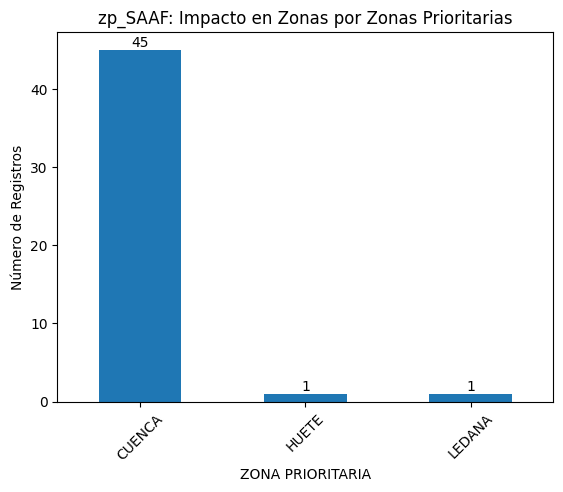

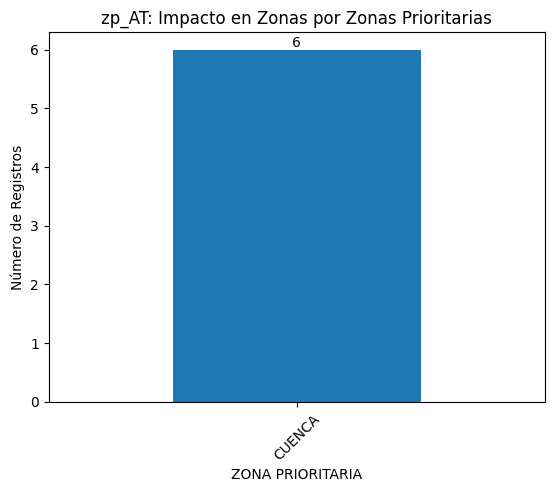

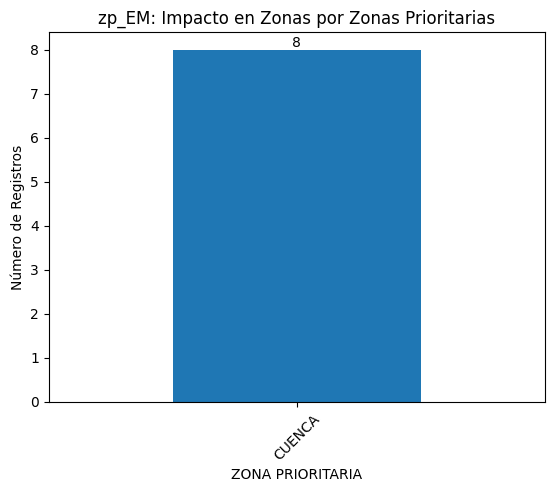

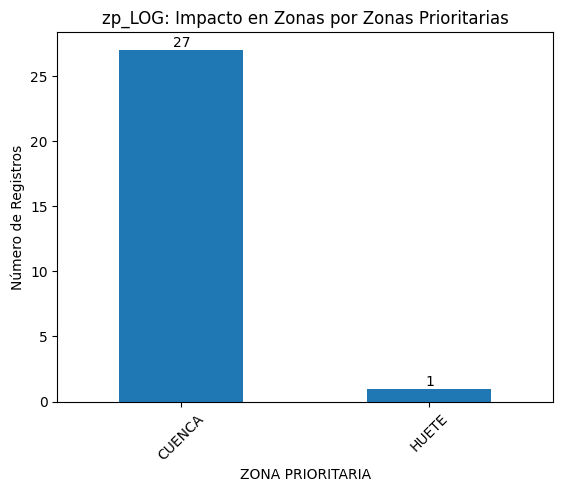

In [14]:
# Iterando sobre el diccionario para crear gráficos
for key, df in dict_prio.items():
    # Calcular el conteo de registros para cada categoría
    cat_count = df['LOCALIDAD'].value_counts()

    # Crear un gráfico de barras
    ax = cat_count.sort_index().plot(kind='bar')

    # Personalización adicional
    plt.title(f'{key}: Impacto en Zonas por Zonas Prioritarias')
    plt.xlabel('ZONA PRIORITARIA')
    plt.ylabel('Número de Registros')
    plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejor lectura

    # Añadir el número de conteos en la parte superior de cada barra
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')

    # Mostrar el gráfico
    plt.show()

In [15]:
# Iterando sobre el diccionario para crear gráficos y analizar impacto
for key, df in dict_prio.items():
    impact_analysis_per_service(df, key)



En el caso del servicio de zp_SAAF, las localidades con impacto dentro de las que se incluyen en las zonas prioritarias son:

La localidad de CUENCA que tiene un impacto fuerte, ya que cuenta con 45 registros.

La localidad de HUETE que tiene un impacto leve, ya que cuenta con 1 registro.

La localidad de LEDANA que tiene un impacto leve, ya que cuenta con 1 registro.



En el caso del servicio de zp_AT, las localidades con impacto dentro de las que se incluyen en las zonas prioritarias son:

La localidad de CUENCA que tiene un impacto medio, ya que cuenta con 6 registros.



En el caso del servicio de zp_EM, las localidades con impacto dentro de las que se incluyen en las zonas prioritarias son:

La localidad de CUENCA que tiene un impacto medio, ya que cuenta con 8 registros.



En el caso del servicio de zp_LOG, las localidades con impacto dentro de las que se incluyen en las zonas prioritarias son:

La localidad de CUENCA que tiene un impacto fuerte, ya que cuenta con 27 registro

In [16]:
# Iterando sobre el diccionario para crear gráficos y analizar impacto
for key, df in dict_prio.items():
  valor = len(df)
  print(f'Para el servicio de {key} hay un total de {valor} usuarios en zonas prioritarias.\n')

Para el servicio de zp_SAAF hay un total de 47 usuarios en zonas prioritarias.

Para el servicio de zp_AT hay un total de 6 usuarios en zonas prioritarias.

Para el servicio de zp_EM hay un total de 8 usuarios en zonas prioritarias.

Para el servicio de zp_LOG hay un total de 28 usuarios en zonas prioritarias.



Para el informe de impacto real de la provincia de Cuenca, tendremos en cuenta la localidad, la fecha de nacimiento y el género de los registros para no duplicar usuarios.

In [17]:
# Definir las columnas comunes
common_columns = ['GENERO','LOCALIDAD', 'FECHA NACIMIENTO', 'CP']

# Llamar a la función
result_df = combine_and_filter_common_columns(dict_prio, common_columns)

impact_analysis(result_df)


Para todos los servicios de la provincia de Cuenca, las localidades con impacto dentro de las que se incluyen en las zonas prioritarias son:

La localidad de CUENCA que tiene un impacto fuerte, ya que cuenta con 79 registros.

La localidad de HUETE que tiene un impacto leve, ya que cuenta con 2 registros.

La localidad de LEDANA que tiene un impacto leve, ya que cuenta con 1 registro.



##Zonas de Despoblación


In [37]:
# dict_mun_desp['md_SAAF']

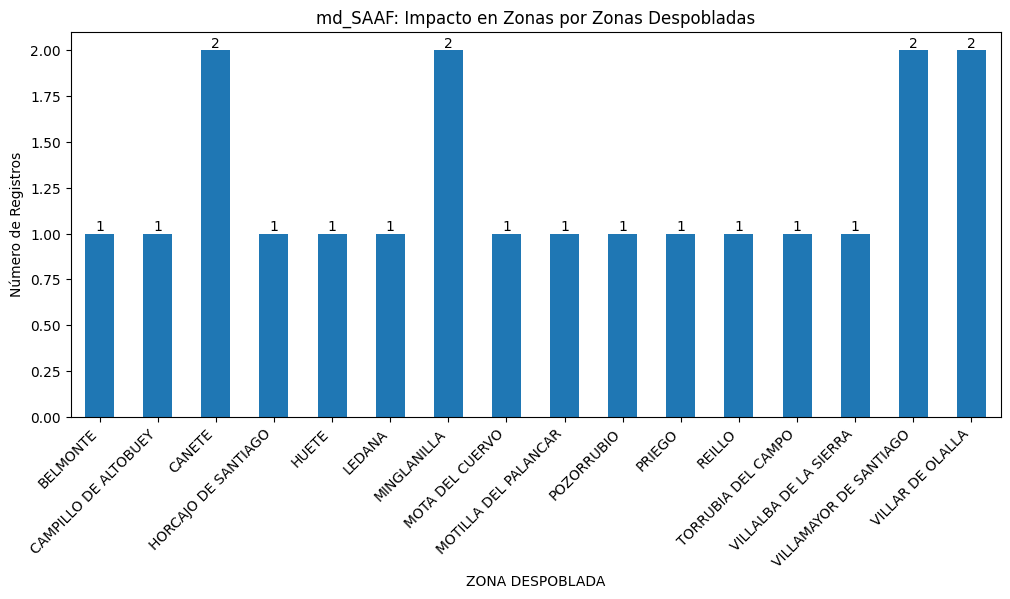

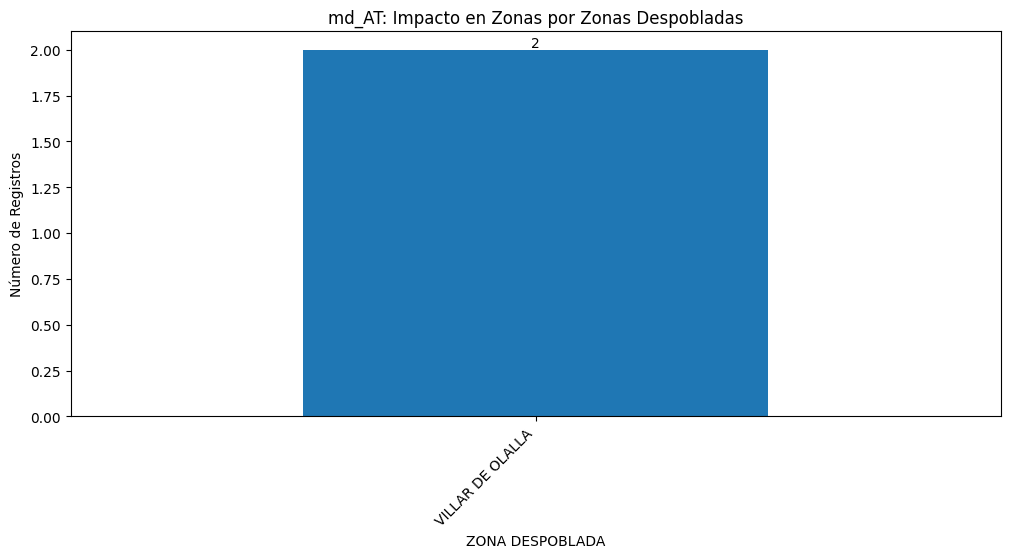

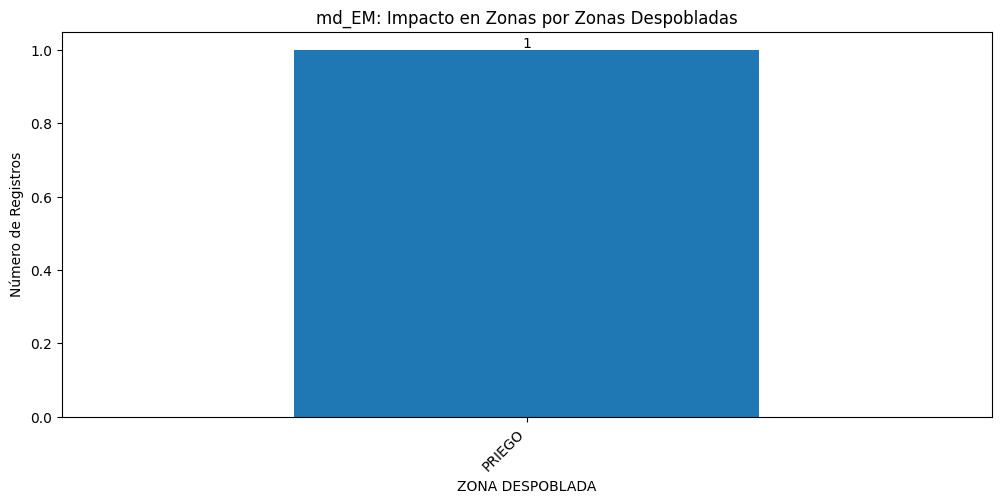

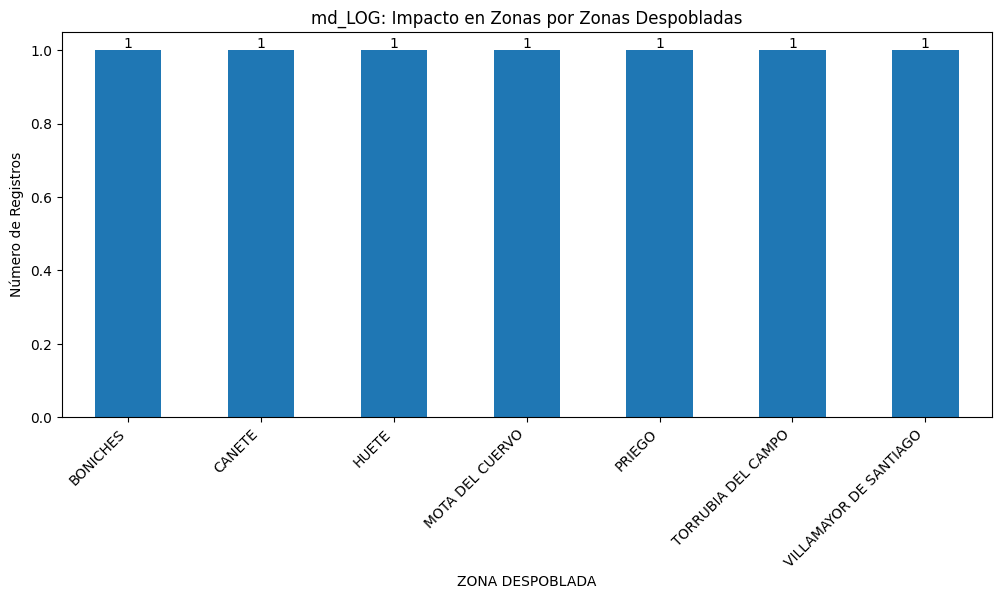

In [34]:
# Iterando sobre el diccionario para crear gráficos
for key, df in dict_mun_desp.items():
    # Calcular el conteo de registros para cada categoría
    cat_count = df['LOCALIDAD'].value_counts()

    plt.figure(figsize=(12, 5))  # Width=12 inches and Height=5 inches
    # Crear un gráfico de barras
    ax = cat_count.sort_index().plot(kind='bar')

    # Personalización adicional
    plt.title(f'{key}: Impacto en Zonas por Zonas Despobladas')
    plt.xlabel('ZONA DESPOBLADA')
    plt.ylabel('Número de Registros')
    plt.xticks(rotation=45, ha = 'right')  # Rota las etiquetas del eje X para mejor lectura
    plt.xticks(fontsize=10)

    # Añadir el número de conteos en la parte superior de cada barra
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')

    # Mostrar el gráfico
    plt.show()

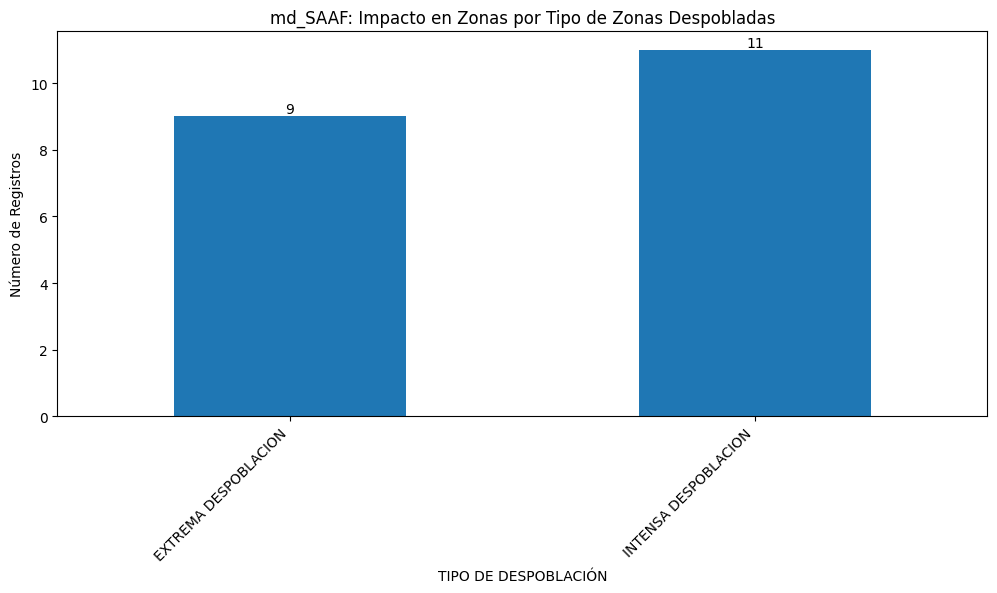

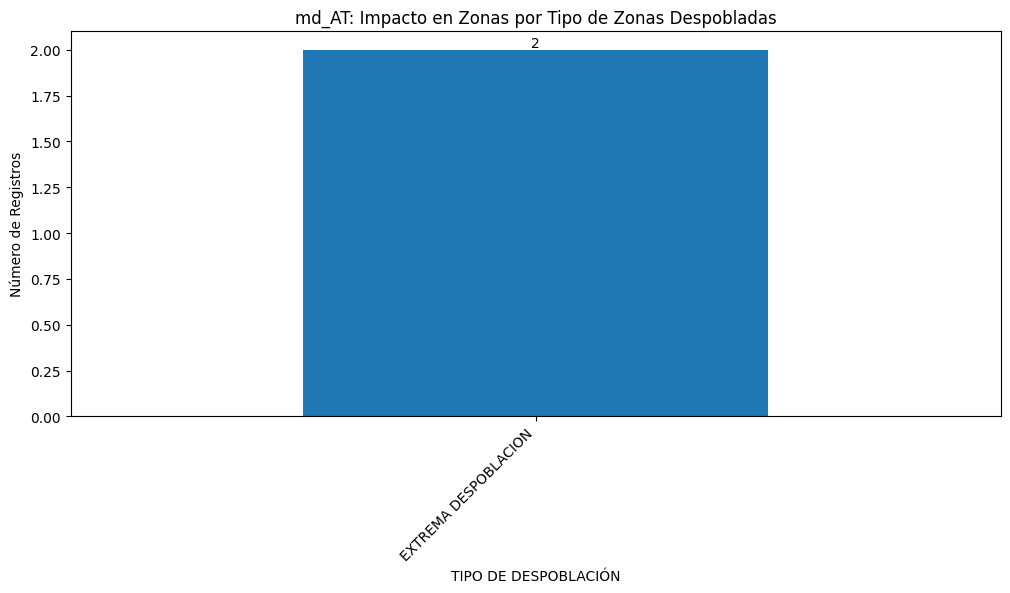

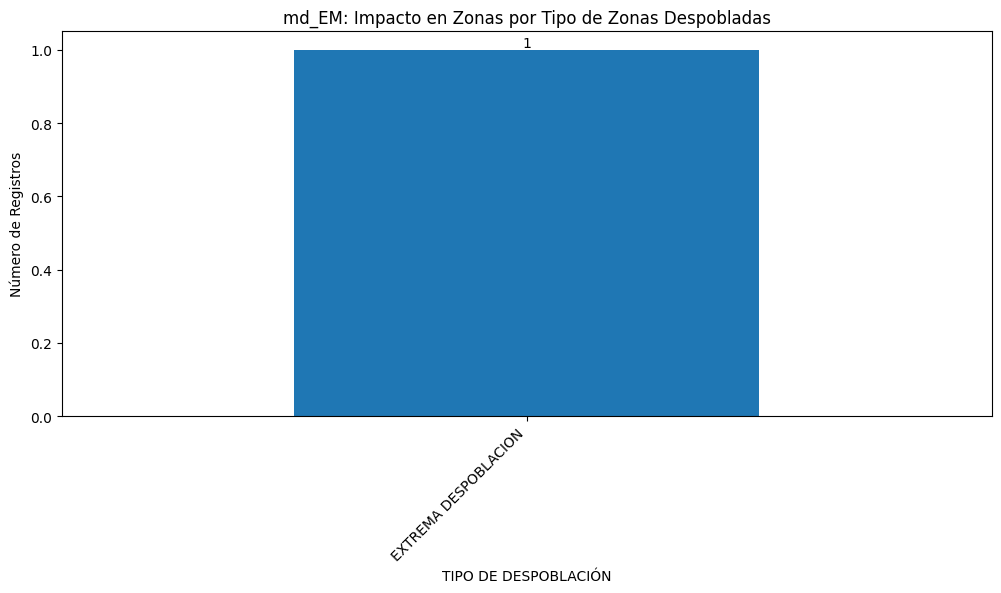

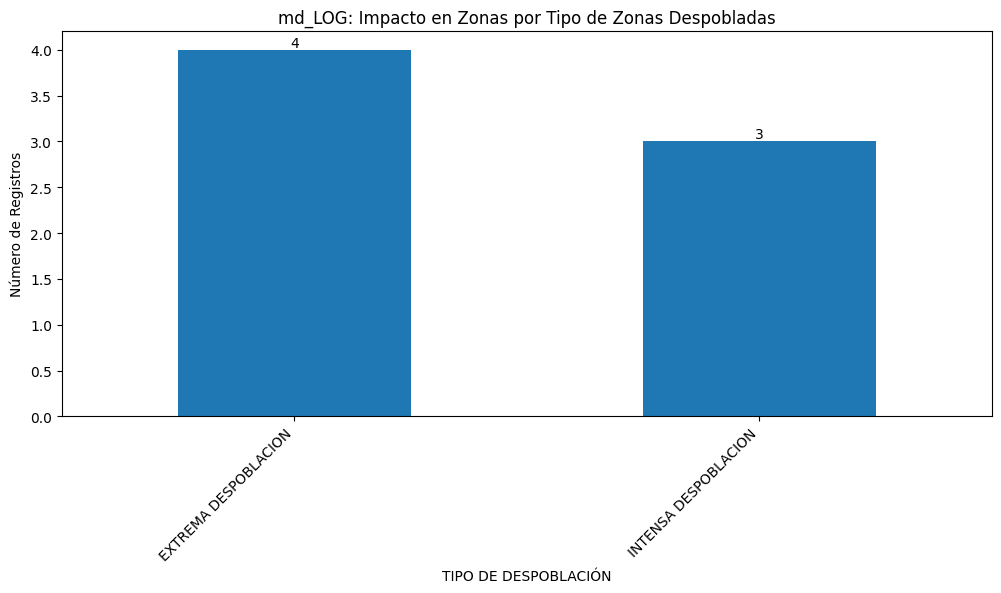

In [36]:
# Iterando sobre el diccionario para crear gráficos
for key, df in dict_mun_desp.items():
    # Calcular el conteo de registros para cada categoría
    cat_count = df['CLASIFICACION DE ZONA'].value_counts()

    plt.figure(figsize=(12, 5))  # Width=12 inches and Height=5 inches
    # Crear un gráfico de barras
    ax = cat_count.sort_index().plot(kind='bar')

    # Personalización adicional
    plt.title(f'{key}: Impacto en Zonas por Tipo de Zonas Despobladas')
    plt.xlabel('TIPO DE DESPOBLACIÓN')
    plt.ylabel('Número de Registros')
    plt.xticks(rotation=45, ha = 'right')  # Rota las etiquetas del eje X para mejor lectura
    plt.xticks(fontsize=10)

    # Añadir el número de conteos en la parte superior de cada barra
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')

    # Mostrar el gráfico
    plt.show()